In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2

In [2]:
def solve_ODE(dx_dt, x0, dt, T):
    N = int(T/dt) # calculate the number of Euler steps necessery to reach T

    t = np.linspace(0, T, N)

    x = np.zeros((len(x0), N+1)) # initialize data array
    x[:,0] = x0

    for t in range(N):
        xt = x[:,t]
        xtp1 = xt + dx_dt(xt) * dt # forward Euler step, to calculate x at t+1
        
        x[:,t+1] = xtp1
    
    return x, t

In [3]:
# A function that will calculate the flowfield for a given 2d ODE
def calc_flowfield(dx_dt, xlim, ylim, density):
    # generate the grid upon which dx_dt will be computed
    xy = np.meshgrid(np.linspace(*xlim, density), np.linspace(*ylim, density))
    xy = np.array(xy).reshape(2,density**2)
    
    # calculate the flow at each grid point
    #dx_dt = np.vectorize(dx_dt)
    uv = np.array([dx_dt(point) for point in xy.T]).T

    return xy, uv

    # create the quiver plot
    plt.figure()

    plt.quiver(*xy, *uv)    

## Task 2 - Lotka-Volterra System
### Task 2.1
We find the fixed points by requiring 
$$\dot x = xa-bxy = 0 \\ \dot y = cxy-ey = 0$$
Solving this system of equations we find to two solutions:
$$(x,y) = (0,0) \ \textrm{ or } \ (x,y) = (\frac{e}{c}, \frac{a}{b})$$

### Task 2.2
Two determine the stability of these fixed points we need to calculate the Jacobian
$$J = \begin{bmatrix}
\partial_x \dot x & \partial_y \dot x \\
\partial_x \dot y & \partial_y \dot y
\end{bmatrix} = \begin{bmatrix}
a - by & - bx \\
cy & cx - e
\end{bmatrix}
$$
We can use this to calculate the total derivate $J$ at the fixpoints
$$\textrm{For } (x,y) = (0,0) \textrm{ the derivative is } J = \begin{bmatrix}
a & 0 \\
0 & -e 
\end{bmatrix}$$
$$\textrm{For } (x,y) = (\frac{e}{c}, \frac{a}{b}) \textrm{ the derivative is } J = \begin{bmatrix}
a - b\frac{a}{b} & -b\frac{e}{c} \\
c\frac{a}{b} & c\frac{e}{c}-e
\end{bmatrix} = 
\begin{bmatrix}
0 & -b\frac{e}{c} \\
c\frac{a}{b} & 0 
\end{bmatrix}$$

In [7]:
print(f'The eigenvalues for J_0 are {np.linalg.eig([[1, 0],[0, -1]])[0]}')
print(f'The eigenvalues for J_1 are {np.linalg.eig([[0, 1],[-1, 0]])[0]}')

The eigenvalues for J_0 are [ 1. -1.]
The eigenvalues for J_0 are [0.+1.j 0.-1.j]


From these Eigenvalues we can gather, that $(0,0)$ is a saddle node while $(\frac{e}{c}, \frac{a}{b})$ is a center.

### Task 2.3

In [18]:
# A function that will return a function representing the derivative 
# of a Lotka-Volterra system with specific parameters
def create_lv(a, c, ):
    b = 1 - a
    e = 1 - c
    return lambda x: np.array([a * x[0] - b * x[0] * x[1], c * x[0] * x[1] - e * x[1]])

In [19]:
parameters = [[0.8, 0.8], [0.8, 0.2], [0.2, 0.8], [0.2, 0.2]]

xlim, ylim = np.array((0,10)), np.array((0,10))

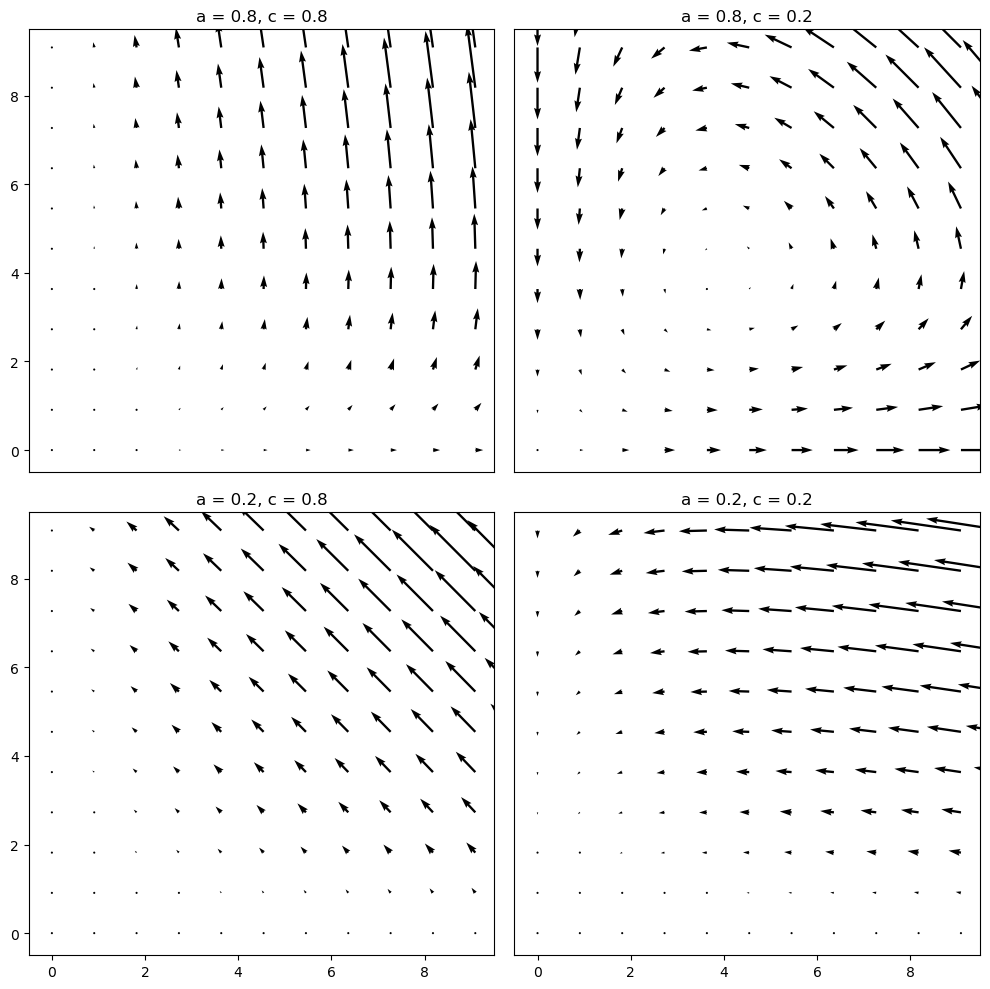

In [20]:
fig, axs = plt.subplots(2, 2, figsize = (10,10), layout = 'tight')

for a, c in parameters:
    i, j = {0.8: 0, 0.2: 1}[a], {0.8: 0, 0.2: 1}[c]
    ax = axs[i,j]

    lv = create_lv(a, c)

    # Plot the flowfield
    xy, uv = calc_flowfield(lv, xlim, ylim, 12)
    ax.quiver(*xy, *uv)

    # Make the plot look nicer
    ax.set_title(f'a = {a}, c = {c}')

    ax.set_xlim(xlim + 2*[(xlim[0] -xlim[1])*0.05, ])
    ax.set_ylim(ylim + 2*[(ylim[0] -ylim[1])*0.05, ])

    if j == 1: ax.set_yticks([])
    if i == 0: ax.set_xticks([])

### Task 2.4

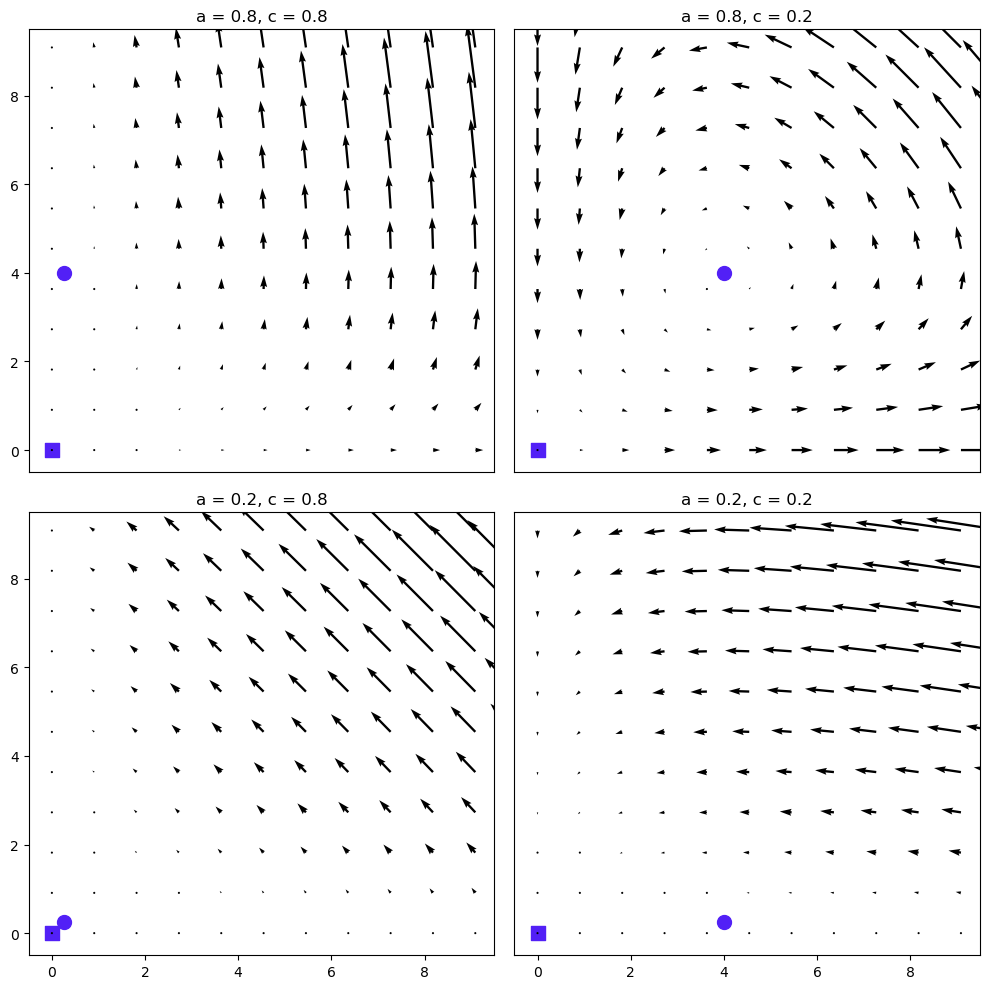

In [45]:
fig, axs = plt.subplots(2, 2, figsize = (10,10), layout = 'tight')

for a, c in parameters:
    i, j = {0.8: 0, 0.2: 1}[a], {0.8: 0, 0.2: 1}[c]
    ax = axs[i,j]

    lv = create_lv(a, c)

    # Plot the flowfield
    xy, uv = calc_flowfield(lv, xlim, ylim, 12)
    ax.quiver(*xy, *uv)

    # Plot the fixedpoints
    ax.scatter(0, 0, 100, color = '#5220F6', marker = 's', zorder=-1)
    ax.scatter((1-c)/c, a/(1-a), 100, color = '#5220F6', marker = 'o', zorder=-1)

    # Make the plot look nicer
    ax.set_title(f'a = {a}, c = {c}')

    ax.set_xlim(xlim + 2*[(xlim[0] -xlim[1])*0.05, ])
    ax.set_ylim(ylim + 2*[(ylim[0] -ylim[1])*0.05, ])

    if j == 1: ax.set_yticks([])
    if i == 0: ax.set_xticks([])

### Task 2.5
To plot the nullclines we first need to find them. The nullclines are the curves along which at least one component of the derivative of the system is zero:
$$\dot x = ax - (1-a)xy = 0 \ \ \ \textrm{or} \\ 
\dot y = cxy - (1-c)y= 0$$
We find these nullclines:
$$x = 0 \land y \in \reals$$
$$y = \frac{a}{1-a} \land x \in \reals$$
$$y = 0 \land x \in \reals$$
$$x = \frac{1-c}{c} \land y \in \reals$$


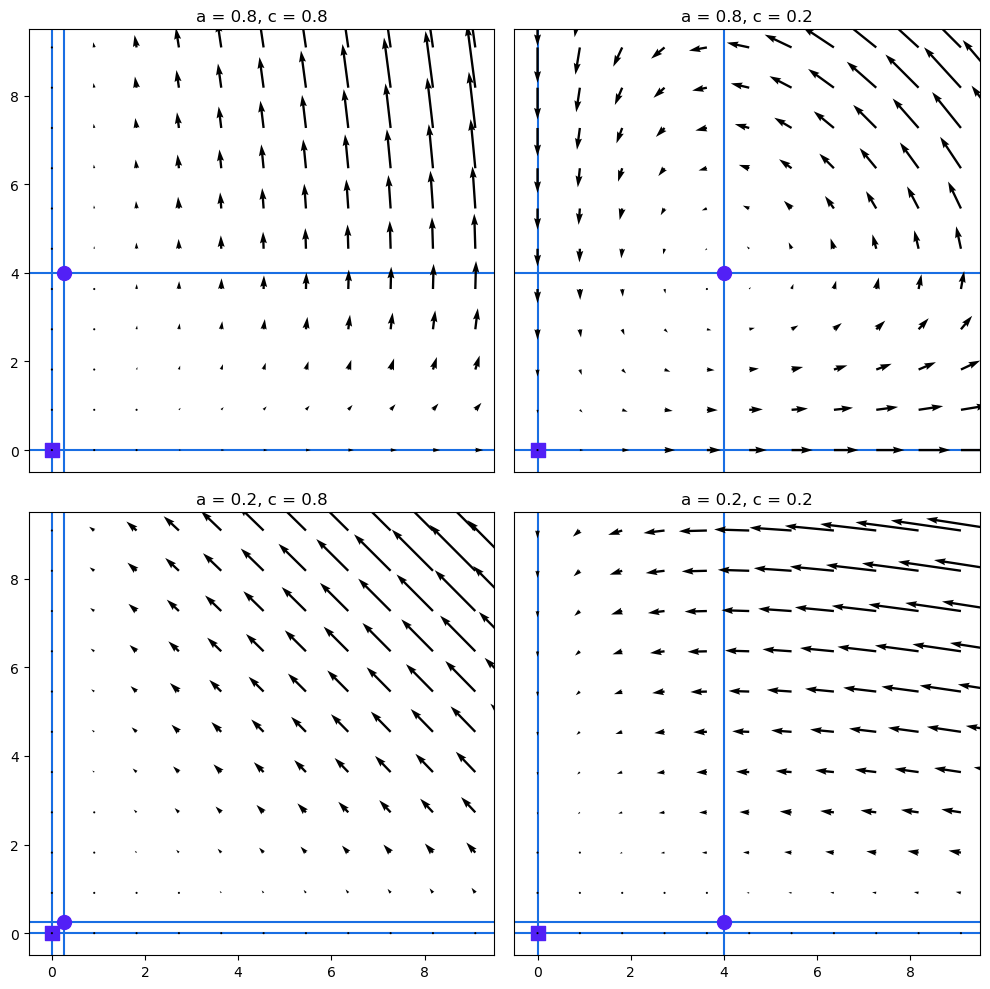

In [41]:
fig, axs = plt.subplots(2, 2, figsize = (10,10), layout = 'tight')

for a, c in parameters:
    i, j = {0.8: 0, 0.2: 1}[a], {0.8: 0, 0.2: 1}[c]
    ax = axs[i,j]

    lv = create_lv(a, c)

    # Plot the flowfield
    xy, uv = calc_flowfield(lv, xlim, ylim, 12)
    ax.quiver(*xy, *uv)

    # Plot the nullclines
    s = [-100,100]
    ax.plot(2*[0,], s, color='#196EE3', zorder=-1)
    ax.plot(s, 2*[0,], color='#196EE3', zorder=-1)
    ax.plot(2*[(1-c)/c,], s, color='#196EE3', zorder=-1)
    ax.plot(s, 2*[a/(1-a),], color='#196EE3', zorder=-1)

    # Plot the fixedpoints
    ax.scatter(0, 0, 100, color = '#5220F6', marker = 's', zorder=-1)
    ax.scatter((1-c)/c, a/(1-a), 100, color = '#5220F6', marker = 'o', zorder=-1)

    # Make the plot look nicer
    ax.set_title(f'a = {a}, c = {c}')

    ax.set_xlim(xlim + 2*[(xlim[0] -xlim[1])*0.05, ])
    ax.set_ylim(ylim + 2*[(ylim[0] -ylim[1])*0.05, ])

    if j == 1: ax.set_yticks([])
    if i == 0: ax.set_xticks([])

### Task 2.6

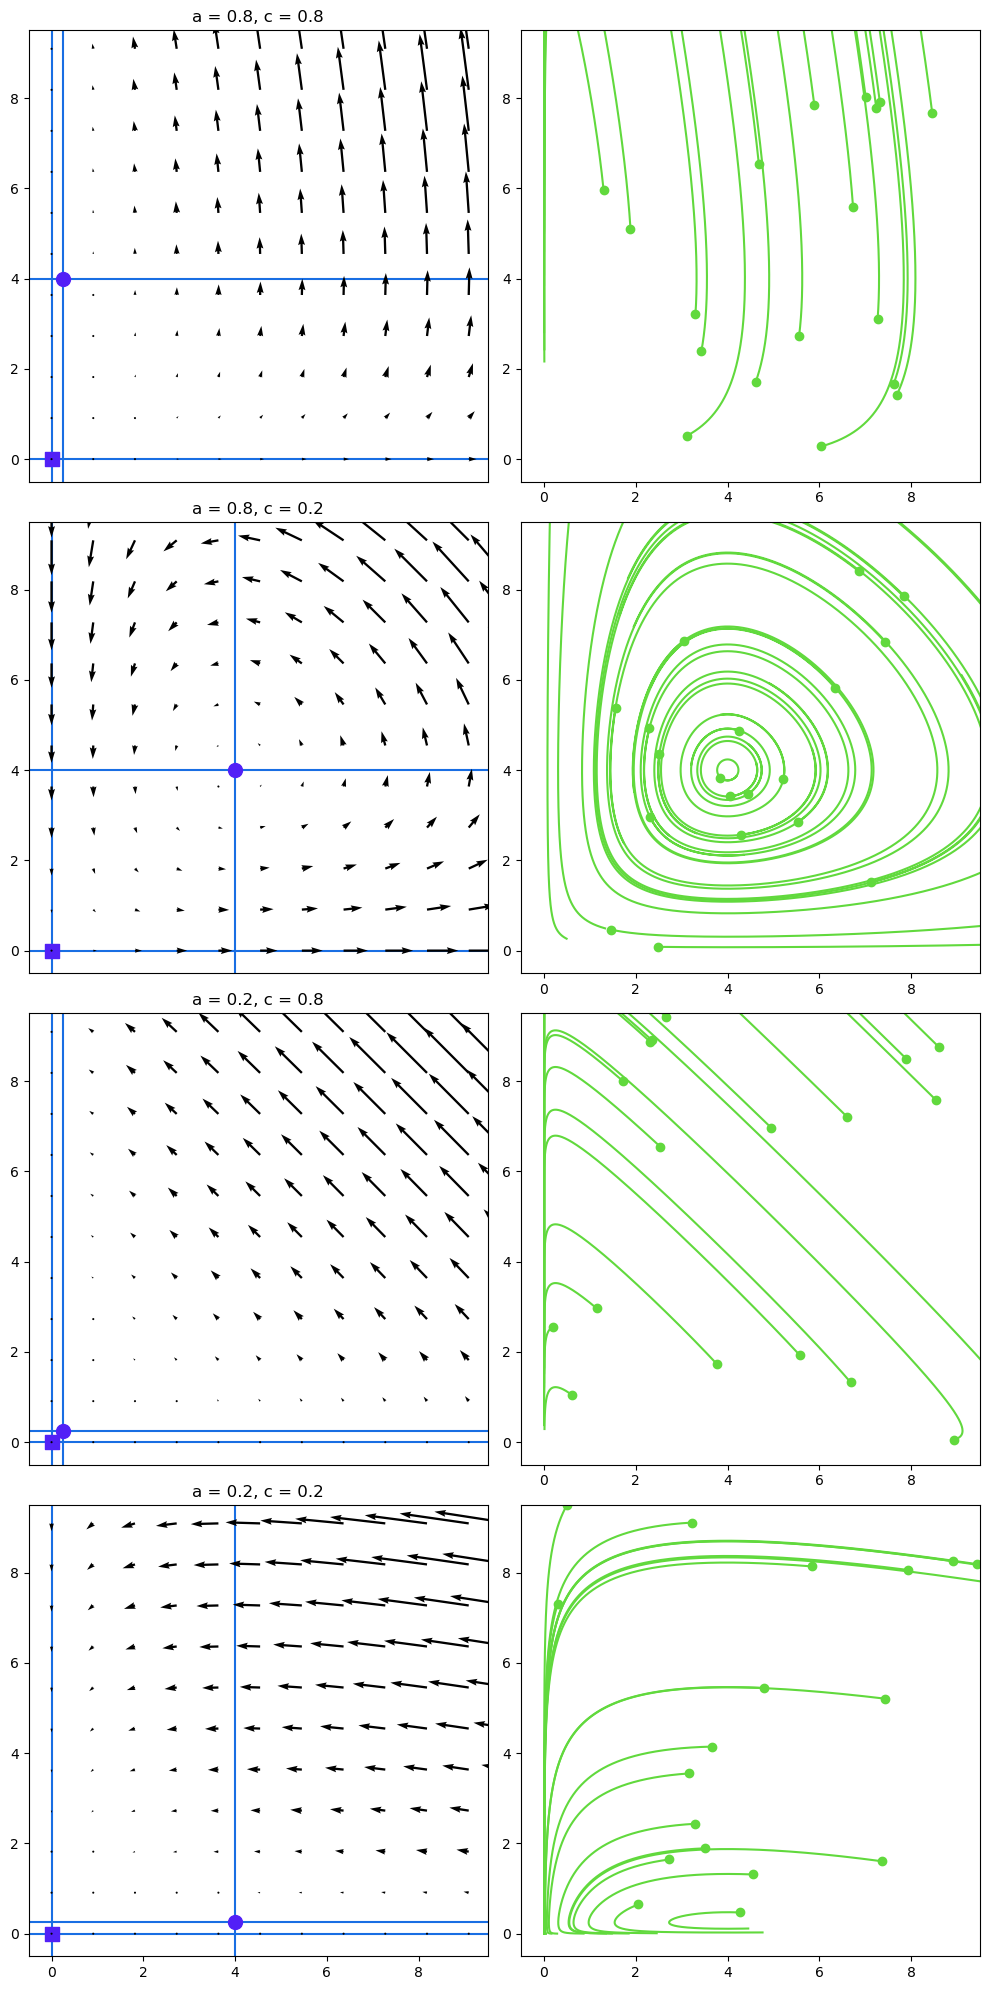

In [44]:
fig, axs = plt.subplots(4, 2, figsize = (10,20), layout = 'tight')

for i, (a, c) in enumerate(parameters):
    i, j = i, 0
    ax = axs[i,j]

    lv = create_lv(a, c)

    # Plot the flowfield
    xy, uv = calc_flowfield(lv, xlim, ylim, 12)
    ax.quiver(*xy, *uv)

    # Plot the nullclines
    s = [-100,100]
    ax.plot(2*[0,], s, color='#196EE3', zorder=-1)
    ax.plot(s, 2*[0,], color='#196EE3', zorder=-1)
    ax.plot(2*[(1-c)/c,], s, color='#196EE3', zorder=-1)
    ax.plot(s, 2*[a/(1-a),], color='#196EE3', zorder=-1)

    # Plot the fixedpoints
    ax.scatter(0, 0, 100, color = '#5220F6', marker = 's', zorder=-1)
    ax.scatter((1-c)/c, a/(1-a), 100, color = '#5220F6', marker = 'o', zorder=-1)

    # Make the plot look nicer
    ax.set_title(f'a = {a}, c = {c}')

    ax.set_xlim(xlim + 2*[(xlim[0] -xlim[1])*0.05, ])
    ax.set_ylim(ylim + 2*[(ylim[0] -ylim[1])*0.05, ])

    if i != 3: ax.set_xticks([])

for i, (a, c) in enumerate(parameters):
    i, j = i, 1
    ax = axs[i,j]

    lv = create_lv(a, c)

    for i in range(20):
        # Solve the differential equation to get a trajectory
        x0 = np.random.random(2)*xlim[1]
        x, t = solve_ODE(lv, x0, 0.001, 10)

        # Plot the trajectory
        ax.plot(*x, color = '#61D93D')
        ax.scatter(*x0, color = '#61D93D')

    ax.set_xlim(xlim + 2*[(xlim[0] -xlim[1])*0.05, ])
    ax.set_ylim(ylim + 2*[(ylim[0] -ylim[1])*0.05, ])


### Task 2.7

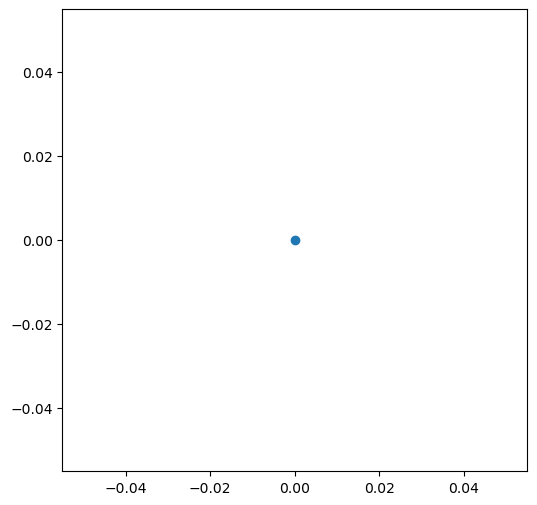

In [48]:
# Solve the Lotka-Volterra system
lv = create_lv(0.8, 0.2)

x0 = (0,0)
x, t = solve_ODE(lv, x0, 0.001, 10)

# Plot the trajectory
plt.figure(figsize=(6,6))

plt.plot(*x)
plt.scatter(*x0)

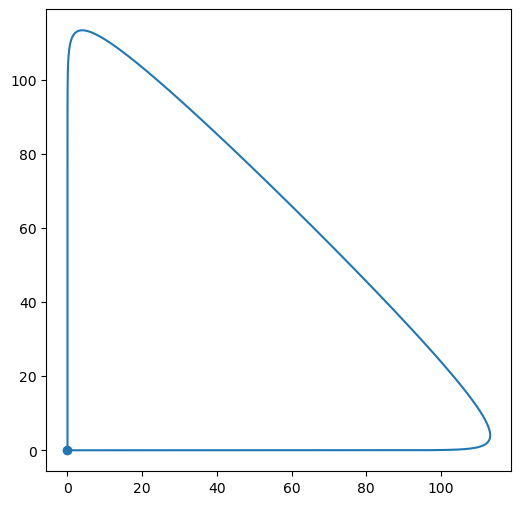

In [53]:
# Solve the Lotka-Volterra system
lv = create_lv(0.8, 0.2)

x0 = (1e-5, 1e-5)
x, t = solve_ODE(lv, x0, 0.001, 50)

# Plot the trajectory
plt.figure(figsize=(6,6))

plt.plot(*x)
plt.scatter(*x0)

For predator prey mechanics this means, that even the slightest ammount of predator or prey can lead to very large populations over time.

### Task 2.8
When one of the two populations is zero, I would expect it to stay that way forever, since there is nothing to reproduce. <br>
We can see this is true in the equations (and nullclines) when x or y are zero their respective derivatives are too, which means that they will never increase. <br>
On the other hand a small perturbation of x will increase exponentially and y will decrease exponentially, when the other one is zero. <br>
In the analogy of prey-predator x-y this of course makes sense: <br>
When there are no predators the prey is able to reproduce indefinetly, when there is no prey the predators will starve to death.

### Task 2.9

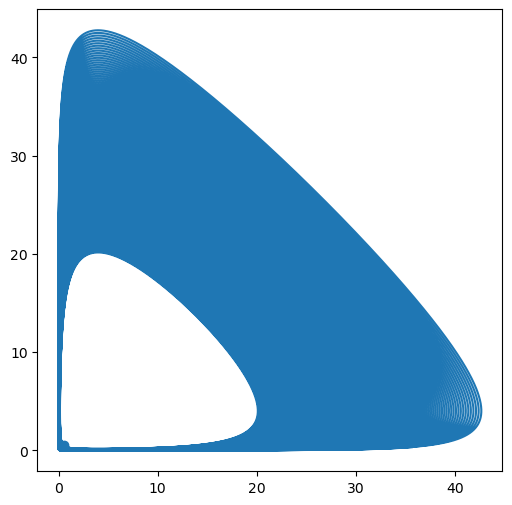

In [96]:
period = 11.25
number_of_periods = 200

# Solve the Lotka-Volterra system
lv = create_lv(0.8, 0.2)

x0 = (0.5, 0.5)
x, t = solve_ODE(lv, x0, 0.001, period * number_of_periods)

# Plot the trajectory
plt.figure(figsize=(6,6))

plt.plot(*x)
plt.scatter(*x0)

We found that the period of the system is $T \sim 11.25$

In [97]:
# Calculate the mean over the different periods of the system
mean0 = None
means = np.zeros([2,0])

print(means.shape)

for i in range(number_of_periods):
    x_ = x[:,int(i*period):int(i*period+period)]

    if i == 0: mean0 = x_.mean(axis = 1)
    means = np.hstack([means, x_.mean(axis = 1)[:,None]])

(2, 0)


(0.0, 2.9322569327289294)

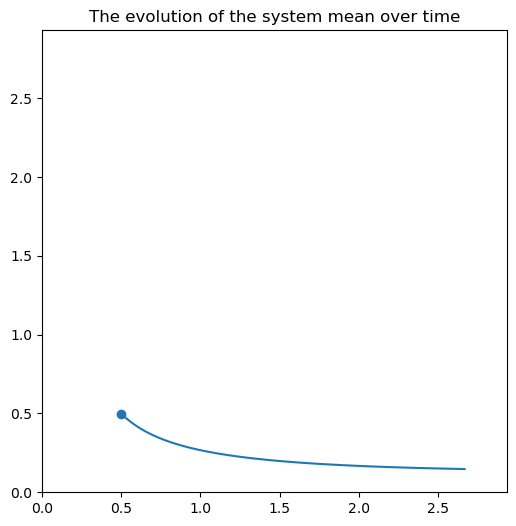

In [103]:
plt.figure(figsize=(6,6))
plt.title('The evolution of the system mean over time')

plt.scatter(*mean0)
plt.plot(*means)

plt.xlim(0,means.max()*1.1)
plt.ylim(0,means.max()*1.1)

I dont know if this drift is due to the actual Lotka-Volterra system or rather the integration error.